<a href="https://colab.research.google.com/github/divyyeahhhhh/Comparative_Analysis_Vitiligo_Progression/blob/main/INCEPTION_NET_for_vitiligo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import os
import numpy as np
# Set the paths to your dataset folders
train_data_dir = '/content/drive/MyDrive/CORE PROJECT/Vitiligo DS'
test_data_dir = '/content/drive/MyDrive/TEST DATASET'

input_shape = (224, 224, 3)  # Input shape for Inception network
batch_size = 32
epochs = 5
learning_rate = 0.001
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'
)
def create_inception_model(input_shape):
    input_layer = Input(shape=input_shape)

    # You can customize the Inception architecture here
    x = Conv2D(64, (1, 1), padding='same', activation='relu')(input_layer)
    # Add more convolutional and inception modules as needed

    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    return model

model = create_inception_model(input_shape)
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)






Found 1211 images belonging to 2 classes.
Found 296 images belonging to 2 classes.
Epoch 1/5
37/37 [==============================] - 416s 11s/step - loss: 93.1905 - accuracy: 0.7371 - val_loss: 22.4576 - val_accuracy: 0.8056
Epoch 2/5
37/37 [==============================] - 369s 10s/step - loss: 3.3288 - accuracy: 0.9500 - val_loss: 0.4488 - val_accuracy: 0.9792
Epoch 3/5
37/37 [==============================] - 348s 9s/step - loss: 0.6134 - accuracy: 0.9635 - val_loss: 0.2186 - val_accuracy: 0.9792
Epoch 4/5
37/37 [==============================] - 350s 9s/step - loss: 0.2421 - accuracy: 0.9779 - val_loss: 0.0244 - val_accuracy: 0.9896
Epoch 5/5
37/37 [==============================] - 348s 9s/step - loss: 0.0723 - accuracy: 0.9627 - val_loss: 0.0400 - val_accuracy: 0.9896


In [ ]:
# Predict using the test data generator
predictions = model.predict(test_generator)
predicted_classes = np.rint(predictions).flatten()

# Calculate accuracy
true_classes = test_generator.classes
accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)


10/10 [==============================] - 14s 1s/step
Accuracy: 0.8006756756756757


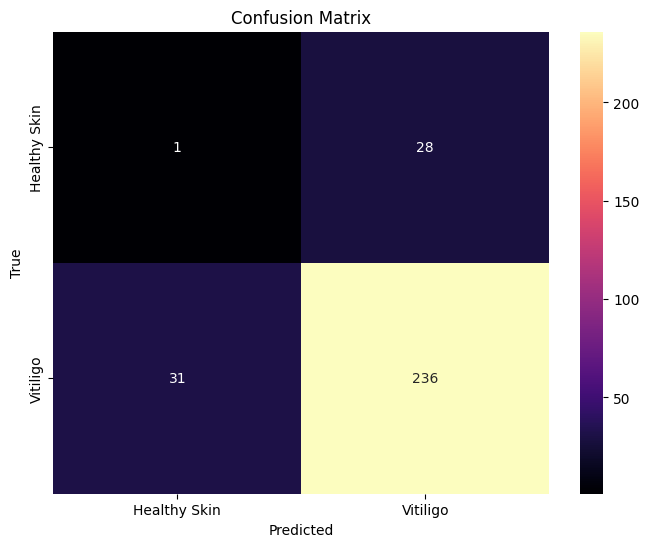

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the true labels and predicted classes
true_labels = true_classes  # Replace with your true labels
predicted_classes = predicted_classes  # Replace with your predicted classes

# Generate the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_classes)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap="magma",
            xticklabels=['Healthy Skin', 'Vitiligo'], yticklabels=['Healthy Skin', 'Vitiligo'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/5
37/37 [==============================] - 351s 9s/step - loss: 0.0625 - accuracy: 0.9559 - val_loss: 0.0326 - val_accuracy: 0.9826
Epoch 2/5
37/37 [==============================] - 347s 9s/step - loss: 0.0958 - accuracy: 0.9383 - val_loss: 0.0162 - val_accuracy: 0.9931
Epoch 3/5
37/37 [==============================] - 358s 10s/step - loss: 0.0559 - accuracy: 0.9873 - val_loss: 0.0104 - val_accuracy: 0.9965
Epoch 4/5
37/37 [==============================] - 353s 10s/step - loss: 0.0645 - accuracy: 0.9890 - val_loss: 0.0056 - val_accuracy: 0.9965
Epoch 5/5
37/37 [==============================] - 356s 10s/step - loss: 0.0537 - accuracy: 0.9898 - val_loss: 0.1221 - val_accuracy: 0.9826


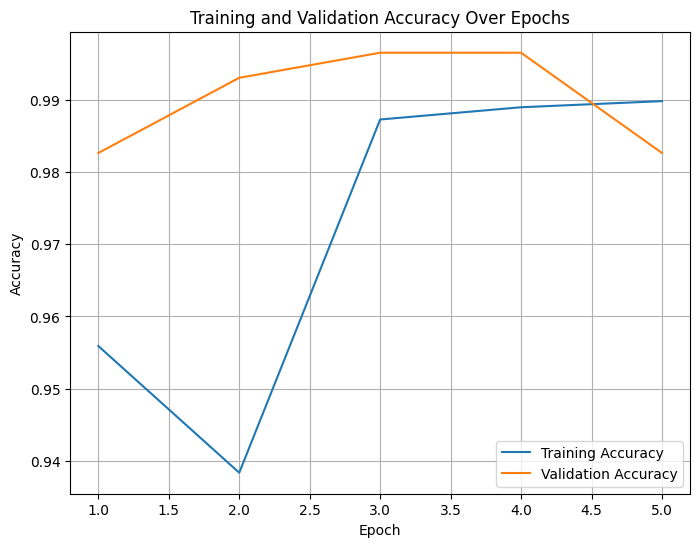

In [ ]:
import matplotlib.pyplot as plt

# ... (previous code for model training)

# Compile and train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Extract accuracy values from the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the accuracy throughout the training epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()
